Only Warengruppe 1!

add libraries

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

load data

In [50]:
df = pd.read_csv('/workspaces/bakery_prediction/2_BaselineModel/split_data/train_data.csv')
df.head()

,id,Datum,Warengruppe,Umsatz,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Woche,Monat,Wochentag,Feiertag,Jahreszeit,Ferien,sunny,cloudy,rainy,thunderstorm
0,1307011,2013-07-01,1,148.828353,0,6,17.8375,15,27,7,1,0,3,0,0,1,0,0
1,1307012,2013-07-01,2,535.856285,0,6,17.8375,15,27,7,1,0,3,0,0,1,0,0
2,1307013,2013-07-01,3,201.198426,0,6,17.8375,15,27,7,1,0,3,0,0,1,0,0
3,1307014,2013-07-01,4,65.890169,0,6,17.8375,15,27,7,1,0,3,0,0,1,0,0
4,1307015,2013-07-01,5,317.475875,0,6,17.8375,15,27,7,1,0,3,0,0,1,0,0


just warengruppe 1

In [51]:
#filter only Warengruppe 1 
df = df[df['Warengruppe'] == 1]

In [52]:
#baseline datum to datetime
df['Datum'] = pd.to_datetime(df['Datum'], format='%Y-%m-%d')

scatter blots

<Figure size 640x480 with 0 Axes>

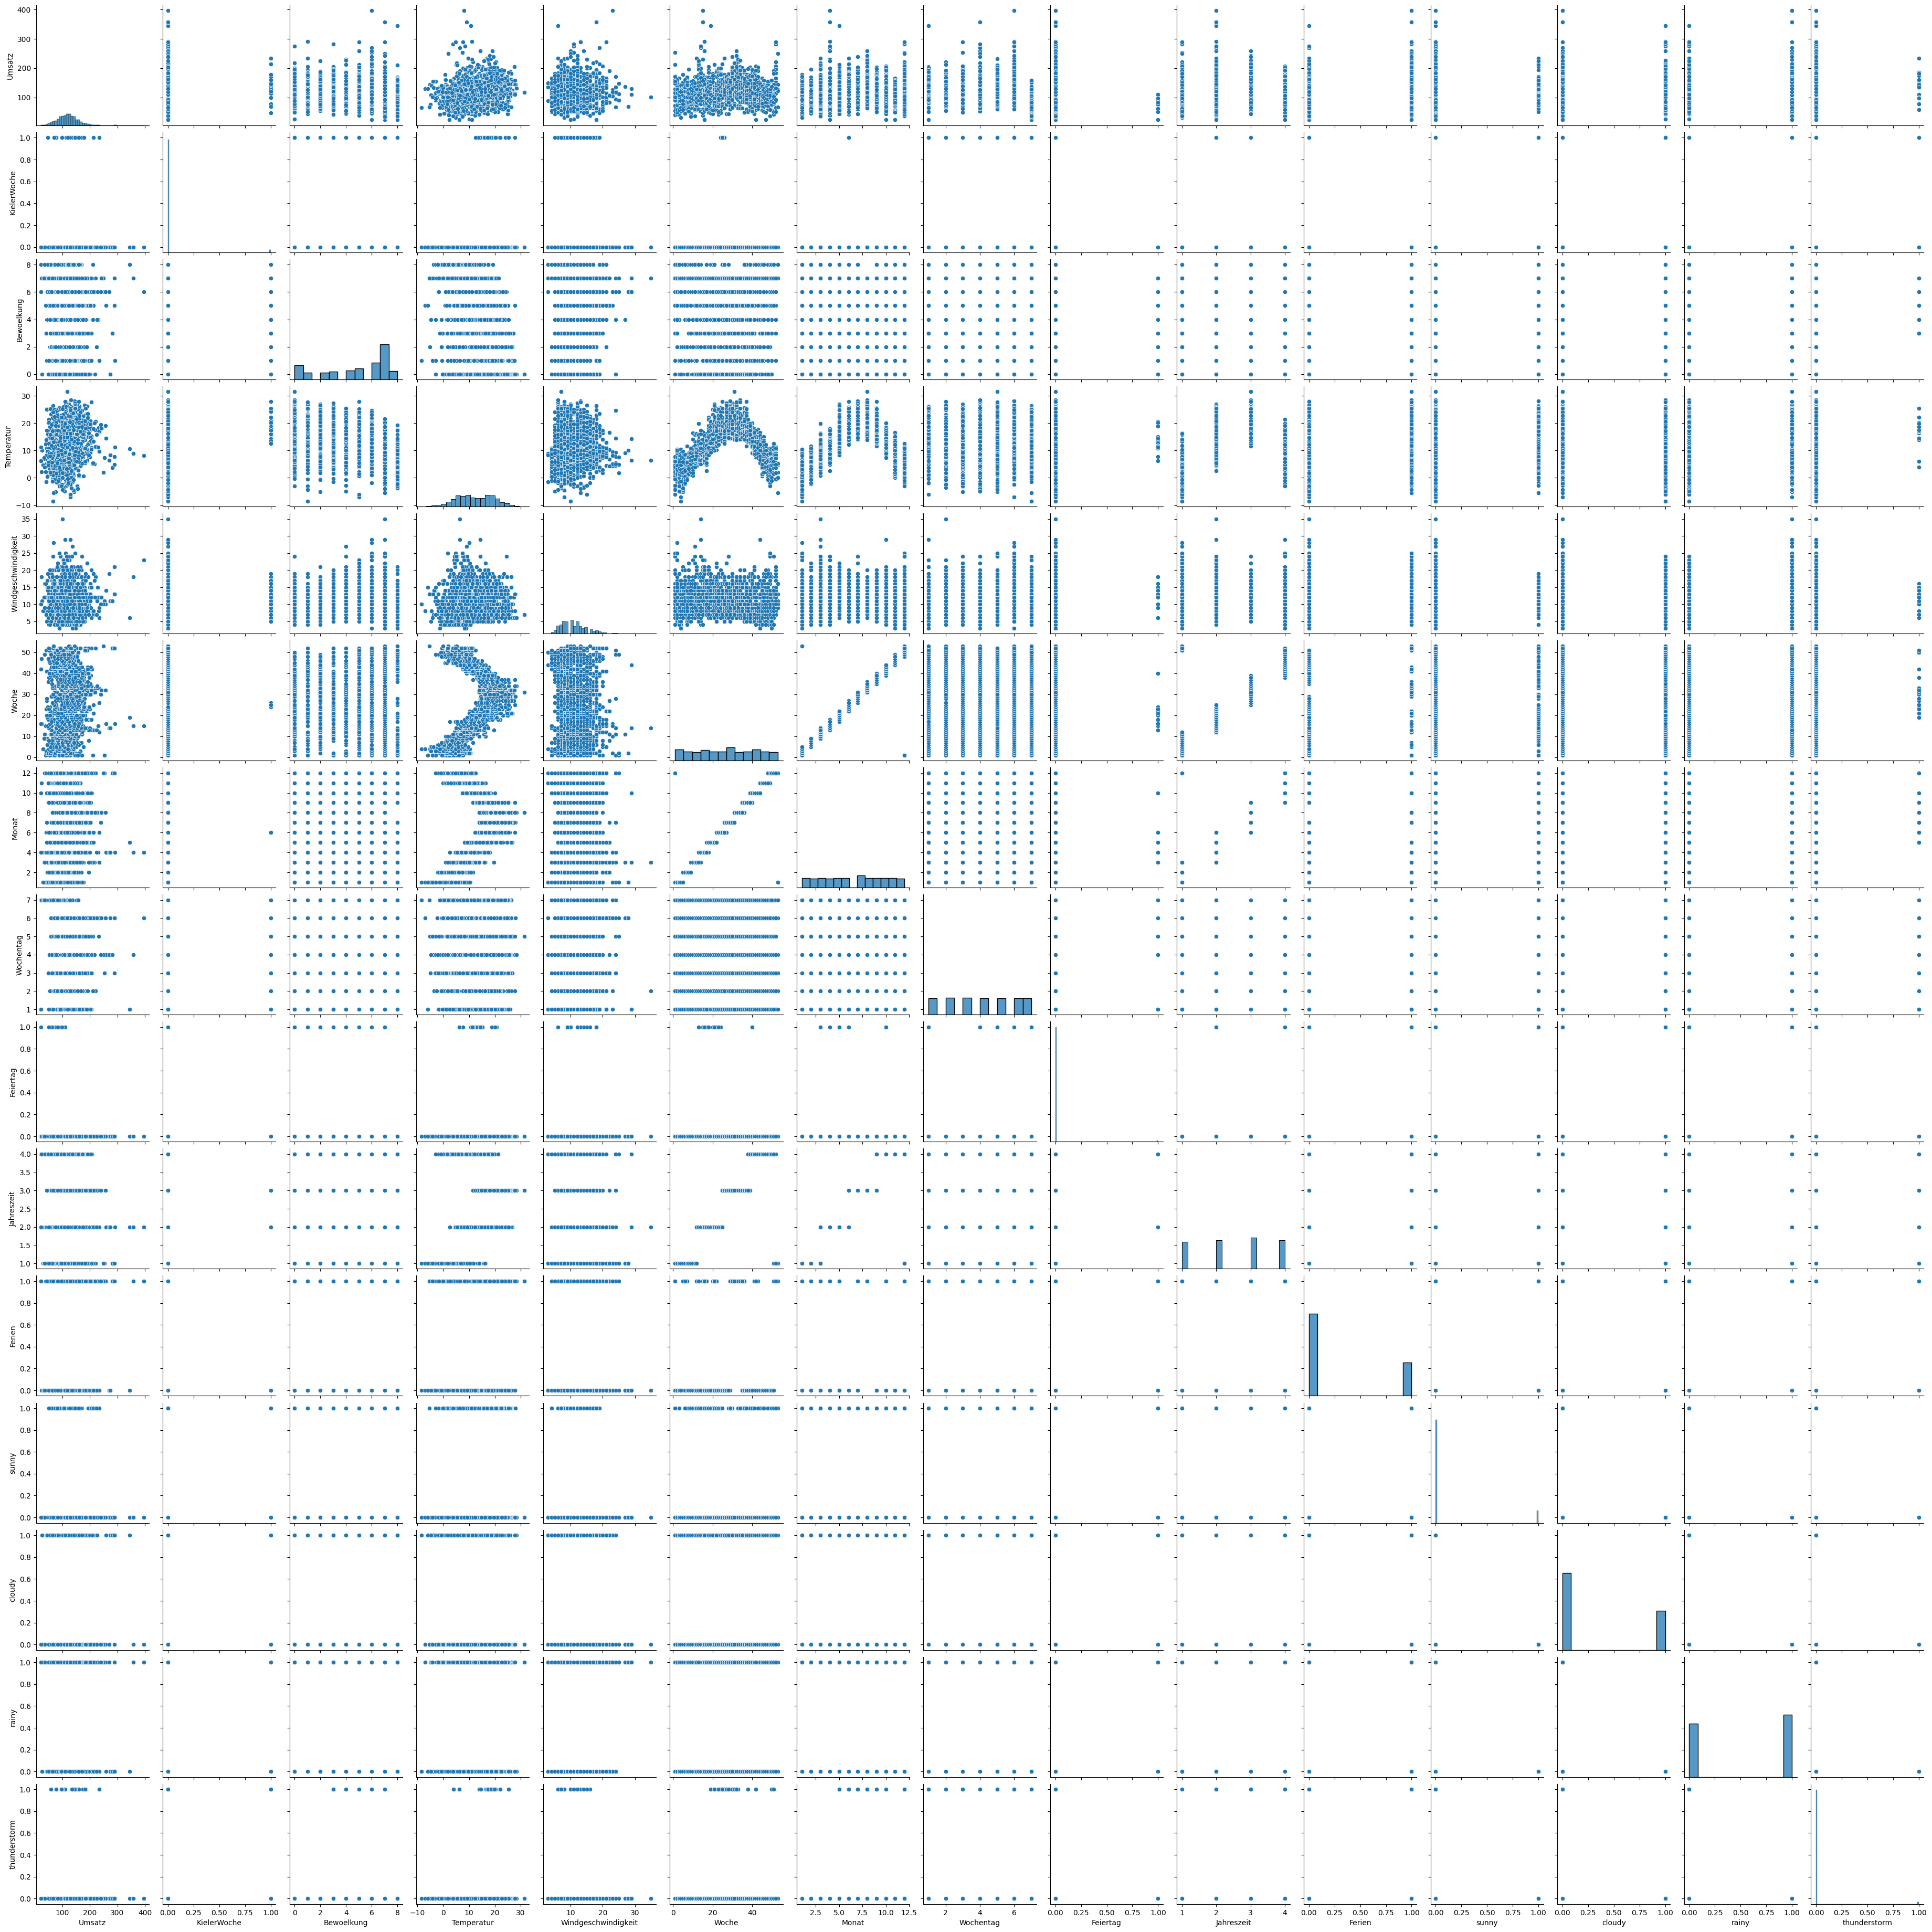

In [53]:
# define a list of numerical features
numerical_features = ['Umsatz', 'KielerWoche', 'Bewoelkung', 'Temperatur', 'Windgeschwindigkeit', 
                      'Woche', 'Monat', 'Wochentag', 'Feiertag', 'Jahreszeit', 'Ferien', 'sunny', 
                      'cloudy', 'rainy', 'thunderstorm']

# create a pairplot, with the df with only numerical features selected
plt.figure()
axes = sns.pairplot(df[numerical_features])

correlation check

In [54]:
df[numerical_features].corr()

,Umsatz,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Woche,Monat,Wochentag,Feiertag,Jahreszeit,Ferien,sunny,cloudy,rainy,thunderstorm
Umsatz,1.000000,0.038620,-0.074449,0.225491,0.022205,0.079613,0.094537,-0.202947,-0.130989,0.050275,0.227007,0.017398,-0.006564,-0.015340,0.043787
KielerWoche,0.038620,1.000000,0.004312,0.144456,0.000242,-0.013634,-0.024390,0.045061,-0.017234,0.019676,-0.101380,0.001202,-0.038435,0.005063,0.125373
Bewoelkung,-0.074449,0.004312,1.000000,-0.378465,0.044792,0.005873,0.001731,-0.008465,-0.064656,-0.022380,-0.017162,-0.229293,-0.009652,0.146683,0.023297
Temperatur,0.225491,0.144456,-0.378465,1.000000,-0.002347,0.259248,0.260330,0.020900,0.021455,0.331858,0.191593,0.082619,-0.162460,0.080324,0.090421
Windgeschwindigkeit,0.022205,0.000242,0.044792,-0.002347,1.000000,-0.105145,-0.112104,-0.002068,0.020244,-0.134579,0.034968,-0.044926,-0.050676,0.070178,0.024265
Woche,0.079613,-0.013634,0.005873,0.259248,-0.105145,1.000000,0.969200,-0.005657,-0.018635,0.874475,0.022358,-0.014768,-0.061274,0.059478,0.032082
Monat,0.094537,-0.024390,0.001731,0.260330,-0.112104,0.969200,1.000000,-0.005687,-0.016650,0.866800,0.019185,-0.019374,-0.060361,0.061447,0.032255
Wochentag,-0.202947,0.045061,-0.008465,0.020900,-0.002068,-0.005657,-0.005687,1.000000,-0.066248,0.005124,-0.061616,-0.013213,-0.001404,0.015567,-0.024493
Feiertag,-0.130989,-0.017234,-0.064656,0.021455,0.020244,-0.018635,-0.016650,-0.066248,1.000000,-0.005853,0.043357,0.044085,-0.009735,-0.015034,-0.013407
Jahreszeit,0.050275,0.019676,-0.022380,0.331858,-0.134579,0.874475,0.866800,0.005124,-0.005853,1.000000,-0.042716,-0.026466,-0.033873,0.040758,0.032288


linear regression with temperature

In [55]:
# define the dependent variable
Y = df["Umsatz"]

# define the DataFrame with the independent variable and the constant term
X = sm.add_constant(df["Temperatur"])

# create the model
model = sm.OLS(Y, X)

# fit the model
results = model.fit()

# print the summary of the regression results
print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     78.21
Date:                Thu, 27 Nov 2025   Prob (F-statistic):           2.61e-18
Time:                        13:58:23   Log-Likelihood:                -7419.3
No. Observations:                1462   AIC:                         1.484e+04
Df Residuals:                    1460   BIC:                         1.485e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        105.7600      2.032     52.057      0.0

Interpreting the model

<Axes: xlabel='Temperatur', ylabel='Umsatz'>

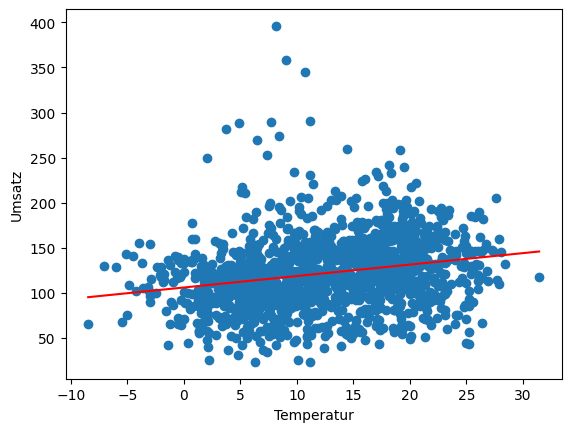

In [56]:
# get the parameter values from the model
m = results.params["Temperatur"]
b = results.params["const"]

# create the scatter plot
plt.scatter(df['Temperatur'], df['Umsatz'])

# calculate the line of best fit
line = m * df["Temperatur"] + b

# assign "price" as the y-label
plt.ylabel("Umsatz")

# add the line of best fit to the scatter plot
sns.lineplot(x=df["Temperatur"], y=line, color="red")

add another variable "Ferien"

In [57]:
predictors = ["Temperatur", "Windgeschwindigkeit", "Woche"]
Y = df["Umsatz"]
X = sm.add_constant(df[predictors])
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     26.64
Date:                Thu, 27 Nov 2025   Prob (F-statistic):           8.97e-17
Time:                        13:58:27   Log-Likelihood:                -7418.5
No. Observations:                1462   AIC:                         1.484e+04
Df Residuals:                    1458   BIC:                         1.487e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 101.7133    

predict data (not ready!!!)

In [60]:
# load csv
df_val = pd.read_csv('/workspaces/bakery_prediction/2_BaselineModel/split_data/val_data.csv') 

#filter only Warengruppe 1 
df_val = df_val[df_val['Warengruppe'] == 1]

#baseline datum to datetime
df_val['Datum'] = pd.to_datetime(df_val['Datum'])

# set index to datum
df_val = df_val.set_index('Datum')

# get Umsatz for 2017-08-01 (only predictor columns)
Umsatz1 = df_val.loc['2017-08-01', predictors]

# convert to DataFrame + add const
X_new = sm.add_constant(Umsatz1.to_frame().T, has_constant='add')

# predict
prediction = results.predict(X_new)

print(prediction)

# Filtern df_val for 2017-08-01 and get the actual Umsatz
umsatz_actual = df_val.loc[df_val['Datum'] == '2017-08-01', 'Umsatz'].values[0]

2017-08-01    131.905924
dtype: float64


KeyError: 'Datum'